In [89]:
import pandas as pd
from sklearn.experimental import enable_iterative_imputer
import sklearn.impute as imp
import sklearn.preprocessing as preproc
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.pipeline import make_pipeline, Pipeline, make_union, FeatureUnion
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA
import sklearn.linear_model as linear
import sklearn.tree as tree
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [2]:
sklearn.__version__

'1.2.2'

In [80]:
raw = pd.read_csv('raw.csv')
X, y = raw.drop(labels='y', axis=1), raw['y']

categorical_columns = make_column_selector(pattern='C_')
numerical_columns = make_column_selector(pattern='x_')
non_nan_categories = list(raw.loc[:, raw.columns.str.contains('C_')].dropna().apply(lambda x: x.unique()).to_numpy())

onehot_no_nans_encoder = preproc.OneHotEncoder(
    categories = non_nan_categories, 
    handle_unknown='ignore', 
    sparse_output=False
    )

numerical_imputer = imp.KNNImputer()

onehot_no_nans_transformer = make_column_transformer(
    (onehot_no_nans_encoder, categorical_columns),
    remainder="passthrough"
)

impute_x_transformer = make_column_transformer(
    (numerical_imputer, numerical_columns)
)

extract_categories_transformer = make_column_transformer(
    ("passthrough", categorical_columns)
)
preprocess_x = make_pipeline(onehot_no_nans_transformer, impute_x_transformer)


combine_category_and_imputed_x = make_union(preprocess_x, extract_categories_transformer)

combine_category_and_imputed_x.set_output(transform='pandas')
pipe = combine_category_and_imputed_x

new_data = pipe.fit_transform(X, y)
new_data = new_data.rename(mapper=lambda x: x.split('__')[-1], axis=1)
new_data

classifiers = []
cvs = []
for i in range(1,6):


    y_label = f'C_{i}'
    raw = new_data.dropna(subset=y_label)
    X = raw.drop(columns=y_label)
    y = raw.loc[:, y_label]
    non_nan_categories = list(X.loc[:, X.columns.str.contains('C_')].dropna().apply(lambda x: x.unique()).to_numpy().T)
    
    
    display(non_nan_categories)
    
    onehot_no_nans_encoder = preproc.OneHotEncoder(
        categories = non_nan_categories, 
        handle_unknown='ignore', 
        sparse_output=False
    )
    transformer = make_column_transformer(
        (onehot_no_nans_encoder, categorical_columns),
        remainder = 'passthrough'
    )

    clf = KNeighborsClassifier()
    clf
    pipe = make_pipeline(transformer, clf)
    classifiers.append(pipe)
    cv = GridSearchCV(pipe, param_grid = {"kneighborsclassifier__n_neighbors": [i for i in range(1,11)]})
    cvs.append(cv)

    cv.fit(X, y)


[array(['H', 'I'], dtype=object),
 array(['K', 'G', 'I', 'J', 'H'], dtype=object),
 array(['J', 'I', 'G', 'H', 'K'], dtype=object),
 array(['J', 'G', 'K', 'H', 'I'], dtype=object)]

[array(['H', 'K', 'I', 'G', 'J'], dtype=object),
 array(['K', 'G', 'I', 'J', 'H'], dtype=object),
 array(['J', 'I', 'G', 'H', 'K'], dtype=object),
 array(['J', 'G', 'K', 'H', 'I'], dtype=object)]

[array(['H', 'K', 'I', 'G', 'J'], dtype=object),
 array(['H', 'I'], dtype=object),
 array(['J', 'I', 'G', 'H', 'K'], dtype=object),
 array(['J', 'G', 'K', 'H', 'I'], dtype=object)]

[array(['H', 'K', 'I', 'G', 'J'], dtype=object),
 array(['H', 'I'], dtype=object),
 array(['K', 'G', 'I', 'J', 'H'], dtype=object),
 array(['J', 'G', 'K', 'H', 'I'], dtype=object)]

[array(['H', 'K', 'I', 'G', 'J'], dtype=object),
 array(['H', 'I'], dtype=object),
 array(['K', 'G', 'I', 'J', 'H'], dtype=object),
 array(['J', 'I', 'G', 'H', 'K'], dtype=object)]

In [81]:
imputed_data = new_data.copy()
for i in range(1,6):
    y_label = f'C_{i}'
    df = new_data.loc[new_data[y_label].isna()]
    X = df.drop(columns=y_label)
    preds = cvs[i-1].best_estimator_.predict(X)
    imputed_data.loc[new_data[y_label].isna(), y_label] = preds

imputed_data.to_csv('imputed_data.csv')

### Correlation plot of imputed values 

/tmp/ipykernel_131202/720334086.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  heatmap = sns.heatmap(imputed_data.corr(), vmin=-1, vmax=1, annot=False, cmap='BrBG')


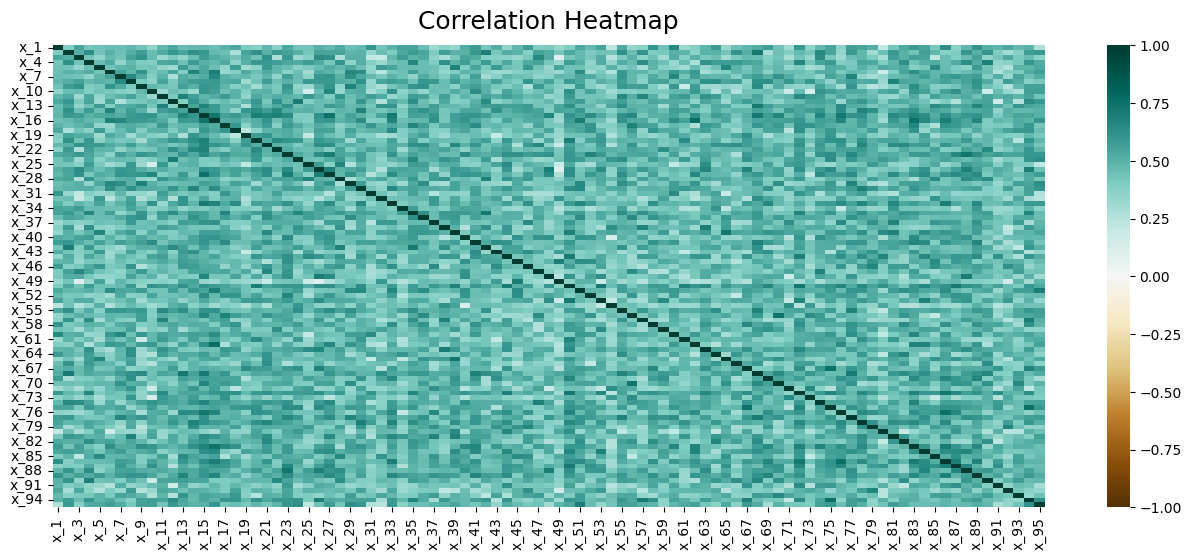

In [87]:
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(imputed_data.corr(), vmin=-1, vmax=1, annot=False, cmap='BrBG', )
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=12);

# Modelling

In [ ]:
linreg = linear.LinearRegression()
lasso = linear.LassoCV()
lasso_lars = linear.LassoLarsCV()
elastic = linear.ElasticNetCV()
ridge = linear.RidgeCV()
pca = PCA()
onehot_encode = preproc.OneHotEncoder()
one_hot_transformer = Colu
